# FINAL PROJECT 4
# Clutering Data Credit Card
Anggota Kelompok 8:
- Rijal Muhammad Farizky
- Diva Nabila

## Project Overview

### Latar Belakang
Dalam dunia bisnis keuangan, terutama pada industri kartu kredit, pemahaman yang mendalam terhadap perilaku pengguna kartu kredit sangat penting. Data transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan dapat memberikan wawasan berharga terkait tren pengeluaran, pola belanja, dan kebiasaan pengguna kartu kredit. Melalui analisis data ini, kita dapat mengidentifikasi kelompok pengguna dengan perilaku serupa, memahami preferensi mereka, dan meningkatkan layanan dan strategi pemasaran yang disesuaikan.
### Tujuan
1. Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
2. Mampu mempersiapkan data untuk digunakan dalam Clustering
3. Mampu mengimplementasikan Clustering pada data yang diberikan

## Pustaka Yang Digunakan

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
import warnings
import pickle

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

## Data Loading
Load Dataset

In [5]:
df = pd.read_csv('../dataset/CC GENERAL.csv')

Row and Column of Dataset

In [6]:
df.shape

(8950, 18)

Dataset memiliki dimensi (baris, kolom): `(8950, 18)`. Selanjutnya melihat 5 data teratas dari dataset.

In [7]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Berdasarkan output terdapat 8950 entries data dengan 18 kolom. Dari 18 kolom tersebut, 2 kolom di antaranya masih memiliki missing value, yaitu `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT`.

# Data Cleaning

### Examine Duplicated Data

Pertama, kita memeriksa duplikasi data.

In [9]:
df.duplicated().sum()

0

Tidak terdapat duplikasi data pada keseluruhan dataset, selanjutnya kita memeriksa missing value pada tiap kolom.

### Examining Missing Value

In [10]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Berdasarkan output terdapat data yang hilang pada `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT`. Untuk kolom `CREDIT_LIMIT` yang hanya berjumlah satu, dilakukan penghapusan baris.

### Handling Missing Value

Selanjutnya pada kolom `MINIMUM_PAYMENTS` DAM `CREDIT_LIMIT` dilakukan analisis distribusi data sebelum dilakukan pengisian data yang hilang.

<Axes: xlabel='MINIMUM_PAYMENTS'>

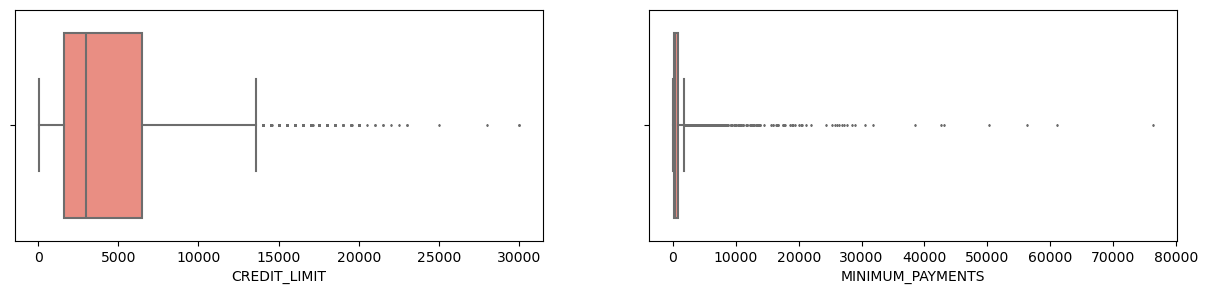

In [11]:
fig, axs = plt.subplots(1,2,figsize=(15, 3))
sns.boxplot(data = df['CREDIT_LIMIT'], x = df['CREDIT_LIMIT'], ax = axs[0], fliersize=1,color='salmon')
sns.boxplot(data = df['MINIMUM_PAYMENTS'], x = df['MINIMUM_PAYMENTS'], ax = axs[1], fliersize=1,color='salmon')

Berdasarkan distribusi data koloM  `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS` berdistribusi tidak normal/ skewed, maka dilakukan pengisian nilai yang hilang dengan nilai median.

In [12]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [13]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Berdasarkan keluaran di atas, seluruh missing value sudah teratasi.

### Drop Unused Column

Kolom `CUST_ID`, merupakan data pribadi pengguna kartu kredit yang tidak diperlukan dalam melakukan clustering sehingga kolom dihapus.

In [14]:
df = df.drop('CUST_ID', axis=1)

In [15]:
df.shape

(8950, 17)

**Kesimpulan**

Berdasarkan hasil Data cleaning jumlah akhir data adalah `8949` baris dan `17` kolom.

# Exploratory Data Analysis

### Data Distribution

Tahap pertama adalah mengetahui persebaran data pada tiap kolom.

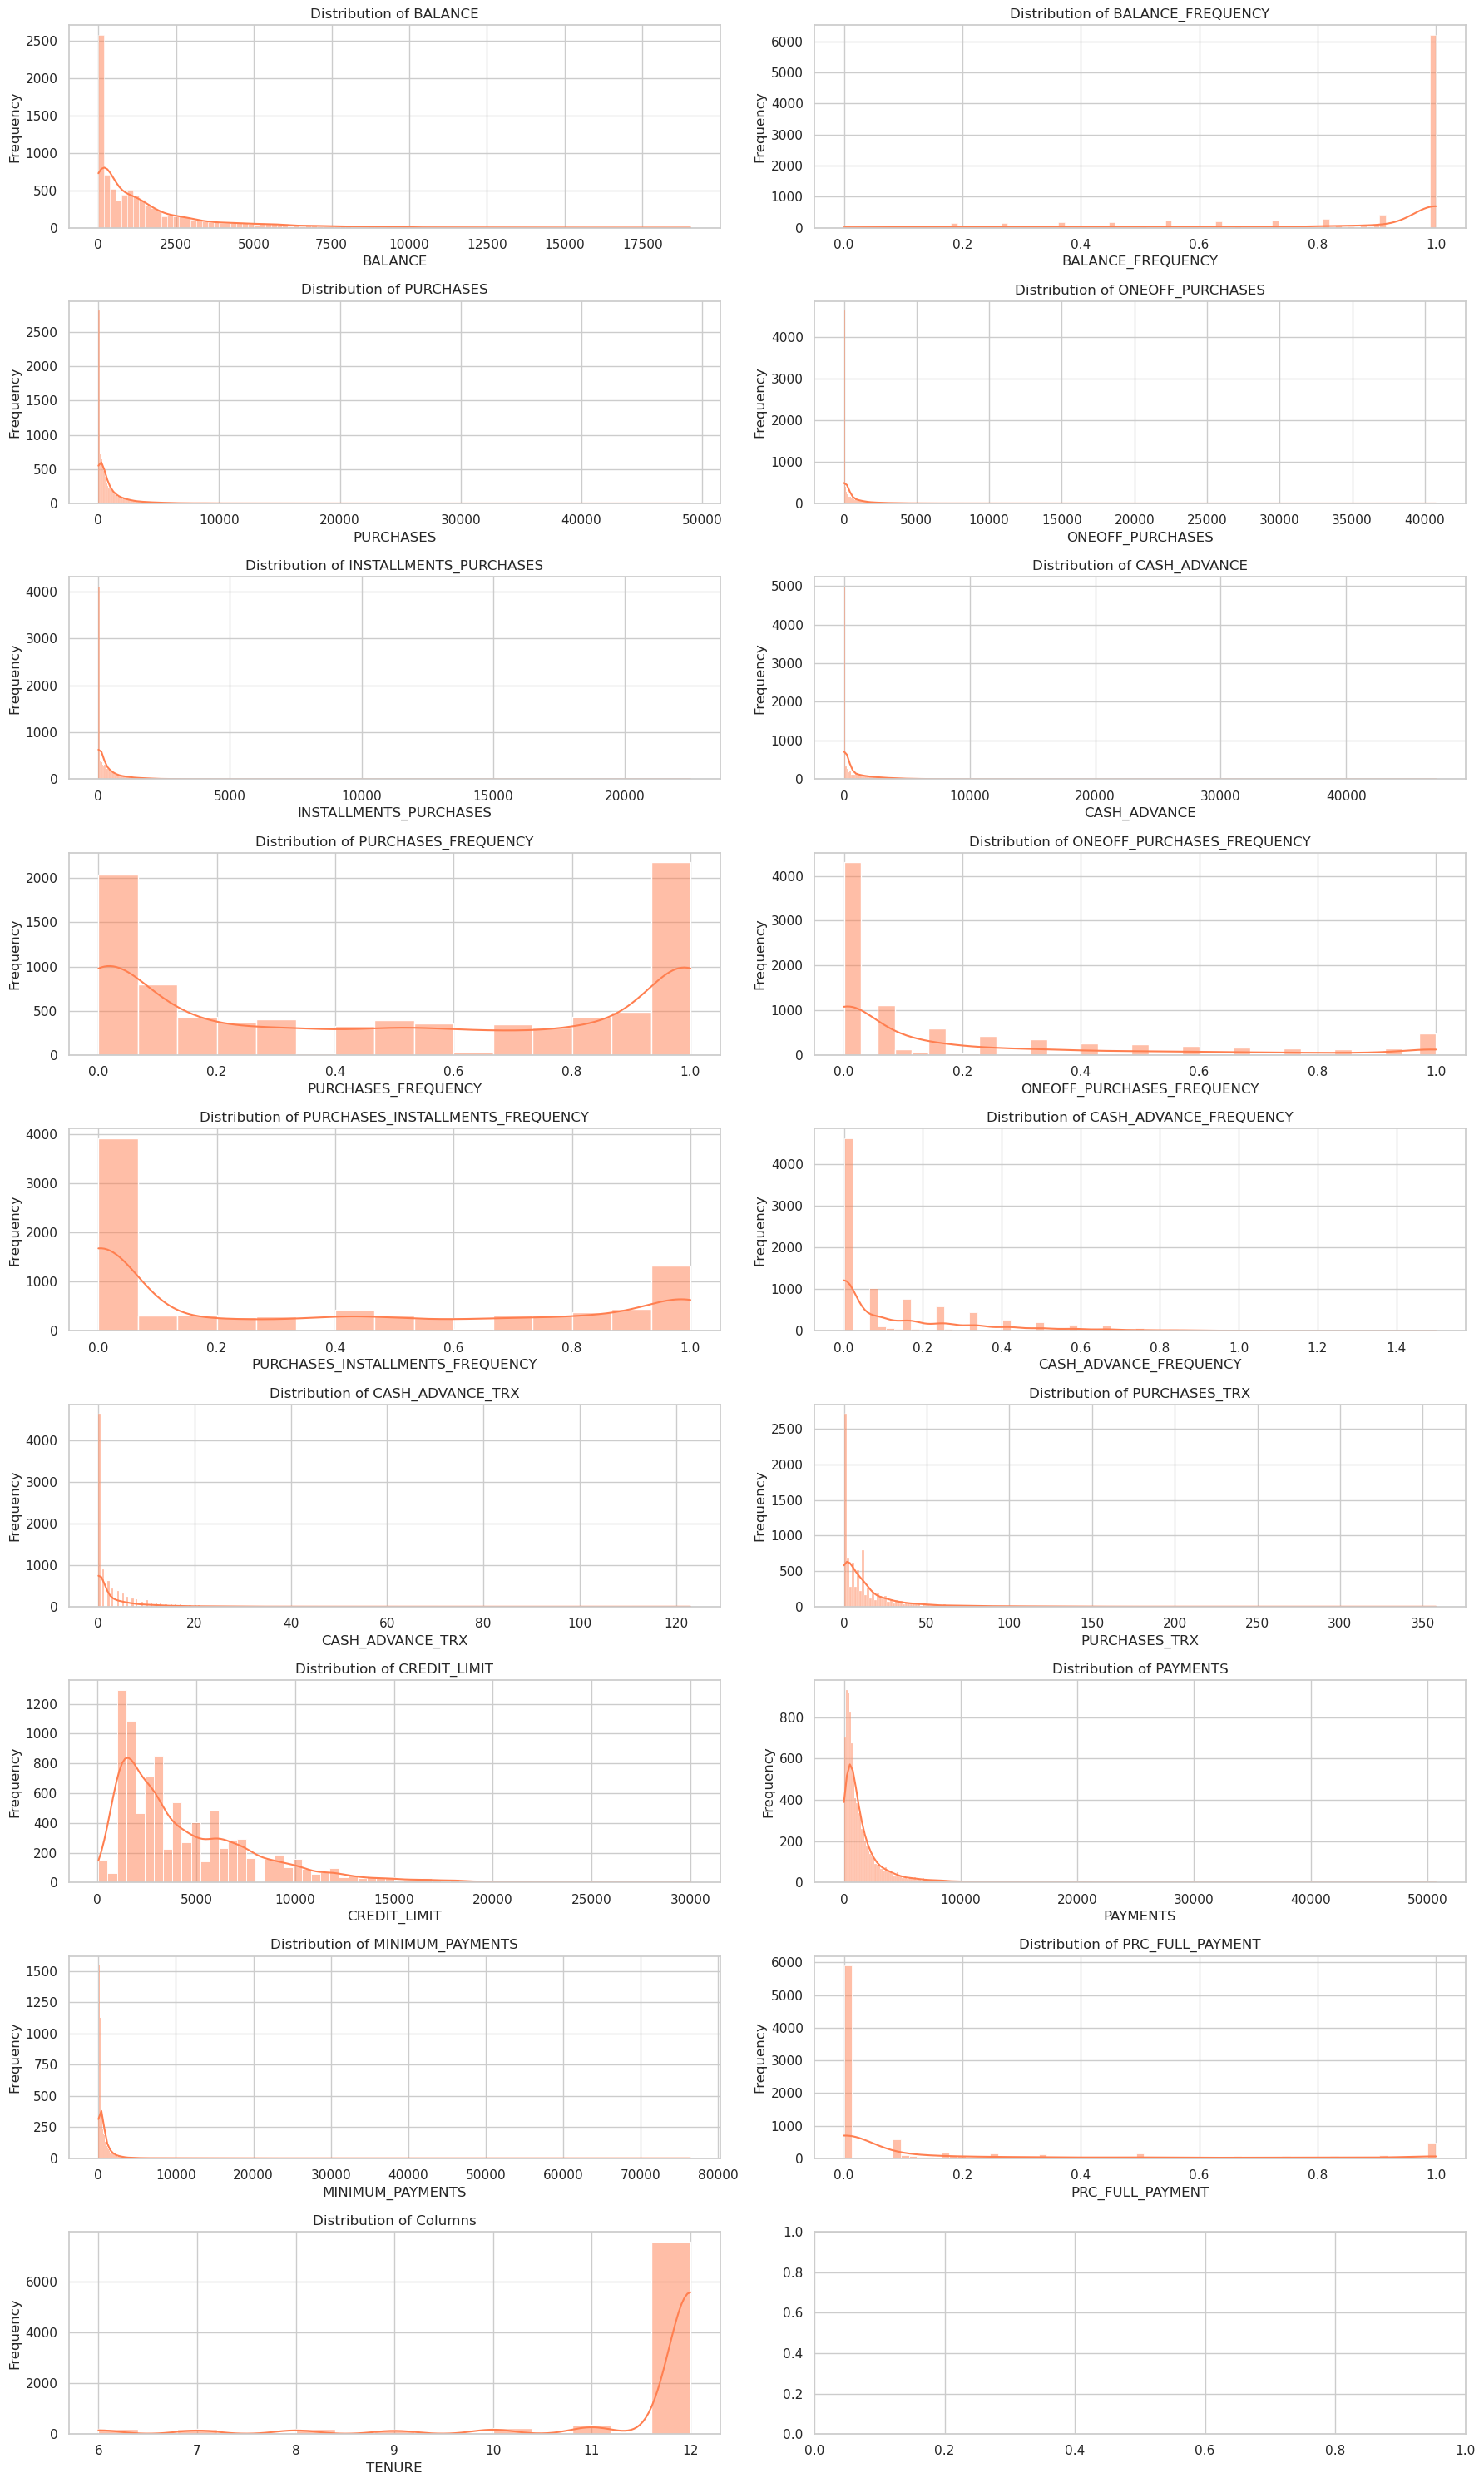

In [16]:
sns.set(style="whitegrid", palette="muted")

num_cols = [column for column in df.columns if df[column].dtype in ['int64', 'float64']]
num_cols_count = len(num_cols)

rows = 9  
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(18, 30))

index = 0

for row in range(rows):
    for col in range(cols):
        if index >=num_cols_count:
            break
        plt.subplot(rows, cols, index + 1)
        sns.histplot(df[num_cols[index]], kde=True, color='coral')
        plt.title(f'Distribution of {num_cols[index]}')
        plt.xlabel(num_cols[index])
        plt.ylabel('Frequency')
        index += 1

plt.tight_layout()
plt.title('Distribution of Columns')
plt.show()

Berdasarkan persebaran data, sebagian besar data cenderung distibusi miring ke kiri (right-skewed) dan nilai tertingginya mendekati nilai 0. Hanya pada kolom tertentu saja yang memiliki perbedaan di antaranya `BALANCE_FREQUENCY` dan `TENURE` yang miring ke kanan (Left-skewed). Setiap fitur numerik menunjukkan adanya outliers. Diasumsikan bahwa nilai-nilai outliers ini relevan untuk penelitian. Kolom yang tidak terdapat outlier adalah `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY`.

**Kesimpulan**
- Pengguna cenderung menggunakan kartu kredit dengan tenure pembayaran selama `12` bulan.
- Kredit Limit Pengguna berkisar antara `0-10000` dan mencapai puncak tertinggi di rentang `0-5000`.
- Jumlah belanja (`Purchase`) yang sering dilakukan pengguna cenderung kecil di bawah `10000`, sehingga jumlah pembayaran dan frequency penggunaan kartu kredit cenderung jarang dan berkisar di nominal yang kecil.
- Pada grafik `PURCHASE_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY` cenderung serupa, sehingga dapat disimpulkan bahwa pembelian yang dilakukan pengguna cenderung dilakukan secara angsuran (`PURCHASES_INSTALLMENTS_FREQUENCY`).

### Purchases Amount

Pada tahap sebelumnya kita sudah mengetahui bahwa pengguna cenderung memilih tenure pembayaran 12 bulan. Sekarang kita akan menghitung nilai minimum, rata-rata dan nilai maksimum dari jumlah belanja pada tiap tenure yang dipilih oleh pengguna.

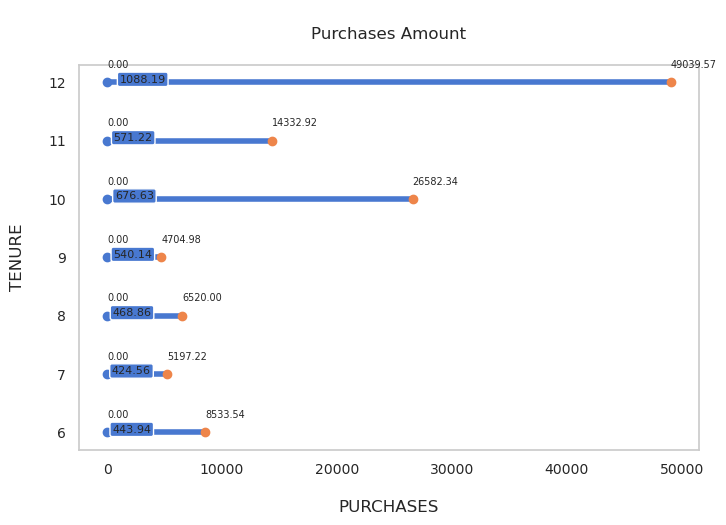

In [17]:
plt.figure(figsize=(8,5))

purc = df[['PURCHASES', 'TENURE']]
purc = purc.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()
tenure = sorted(df['TENURE'].unique())
min_sct = plt.scatter(x=purc['MIN'], y=purc['TENURE'])
max_sct = plt.scatter(x=purc['MAX'], y=purc['TENURE'])

for i in range(len(tenure)):
    purc_x = purc[purc['TENURE']==tenure[i]]
    plt.hlines(y=purc_x['TENURE'], xmin=purc_x['MIN'], xmax=purc_x['MAX'], linewidth=4, zorder=0)
    plt.annotate('{0:.2f}'.format(purc_x['MIN'].values[0]), xy=(purc_x['MIN'].values[0], purc_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(purc_x['AVG'].values[0]), xy=(purc_x['AVG'].values[0], purc_x['TENURE'].values[0]), fontsize=8, bbox=dict(boxstyle='round', pad=0.2))
    plt.annotate('{0:.2f}'.format(purc_x['MAX'].values[0]), xy=(purc_x['MAX'].values[0], purc_x['TENURE'].values[0]+0.25), fontsize=7)

plt.xlabel('\nPURCHASES')
plt.ylabel('TENURE\n')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major')
plt.title('\nPurchases Amount\n')
plt.show()


**Kesimpulan**

Berdasarkan plot di atas, dapat dilihat bahwa pengguna yang memilih Tenure 12 bulan menduduki puncak statistik dengan Jumlah belanja maximum `49039.57` dengan rata-rata jumlah belanja `1088.19`. Tenure 10 bulan menduduki peringkat kedua dengan maksimum jumlah belanja sebesar `26582.34` dan rata-rata jumlah belanja sebesar `676.63`. Tenure 11 bulan menduduki peringkat ketiga dengan maksimum belanja sebesar `14332.92` dan rata-rata `571.22`.

### Purchase Frequency

Pada tahap ini kita akan melihat kategori pembayaran mana yang paling sering digunakan pengguna untuk melakukan pembelian/belanja.

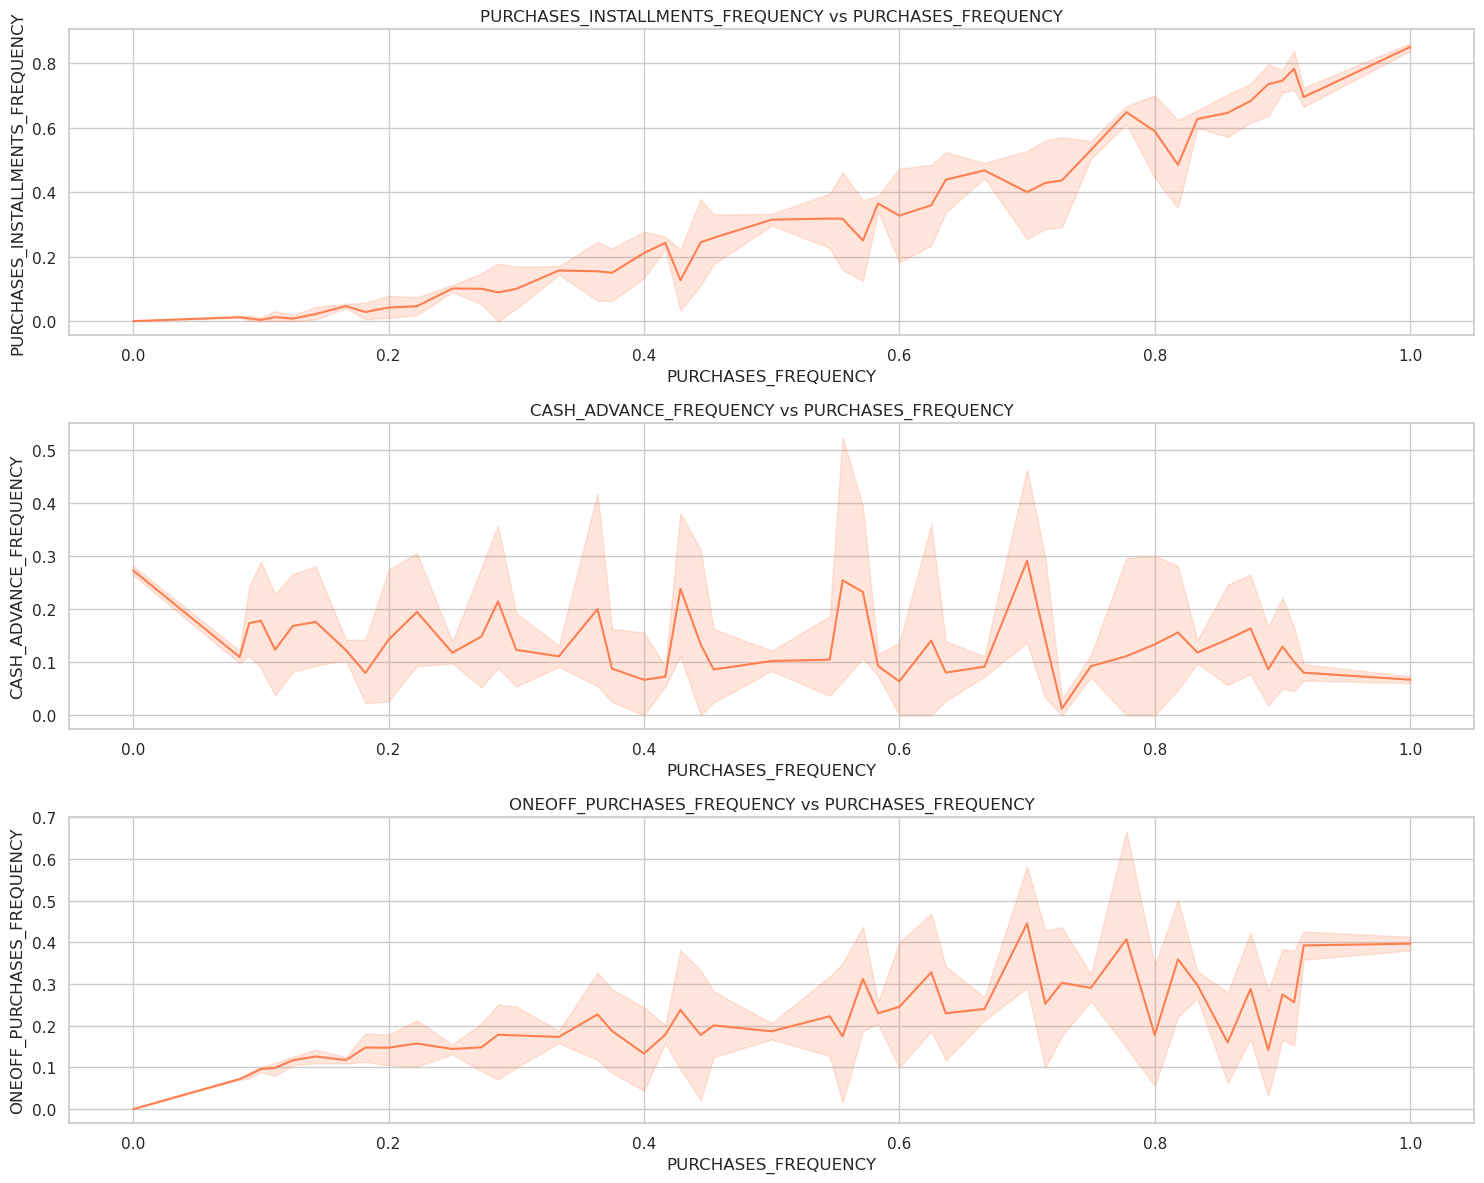

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(15,12))

sns.lineplot(ax=axes[0], x='PURCHASES_FREQUENCY', y='PURCHASES_INSTALLMENTS_FREQUENCY', data=df, color='coral')
axes[0].set_title('PURCHASES_INSTALLMENTS_FREQUENCY vs PURCHASES_FREQUENCY')

sns.lineplot(ax=axes[1], x='PURCHASES_FREQUENCY', y='CASH_ADVANCE_FREQUENCY', data=df, color='coral')
axes[1].set_title('CASH_ADVANCE_FREQUENCY vs PURCHASES_FREQUENCY')

sns.lineplot(ax=axes[2], x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', data=df, color='coral')
axes[2].set_title('ONEOFF_PURCHASES_FREQUENCY vs PURCHASES_FREQUENCY')

plt.tight_layout()

plt.show()

Plot di atas menunjukkan bahwa:
- Semakin tinggi frequensi belanja maka semakin tinggi juga pembayaran dengan angsuran (`PURCHASES_INSTALLMENTS`).
- Pada pembayaran 1 kali (`ONE_OFF_PURCHASES`) grafik cenderung datar.
- Pada penarikan tunai (`CASH_ADVANCE`) grafik menunjukkan kenaikan namun tidak signifikan.

**Kesimpulan**

Berdasarkan uraian di atas dapat disimpulkan bahwa kebayakan pengguna melakukan pembayaran secara angsuran (`PURCHASES_INSTALLMENTS`) kemudian sebagian besarnya lagi melakukan pembelian dengan 1x bayar (`ONE_OFF_PURCHASES`).

### Correlation Map

Selanjutnya, kita akan menghitung korelasi antar attributes.

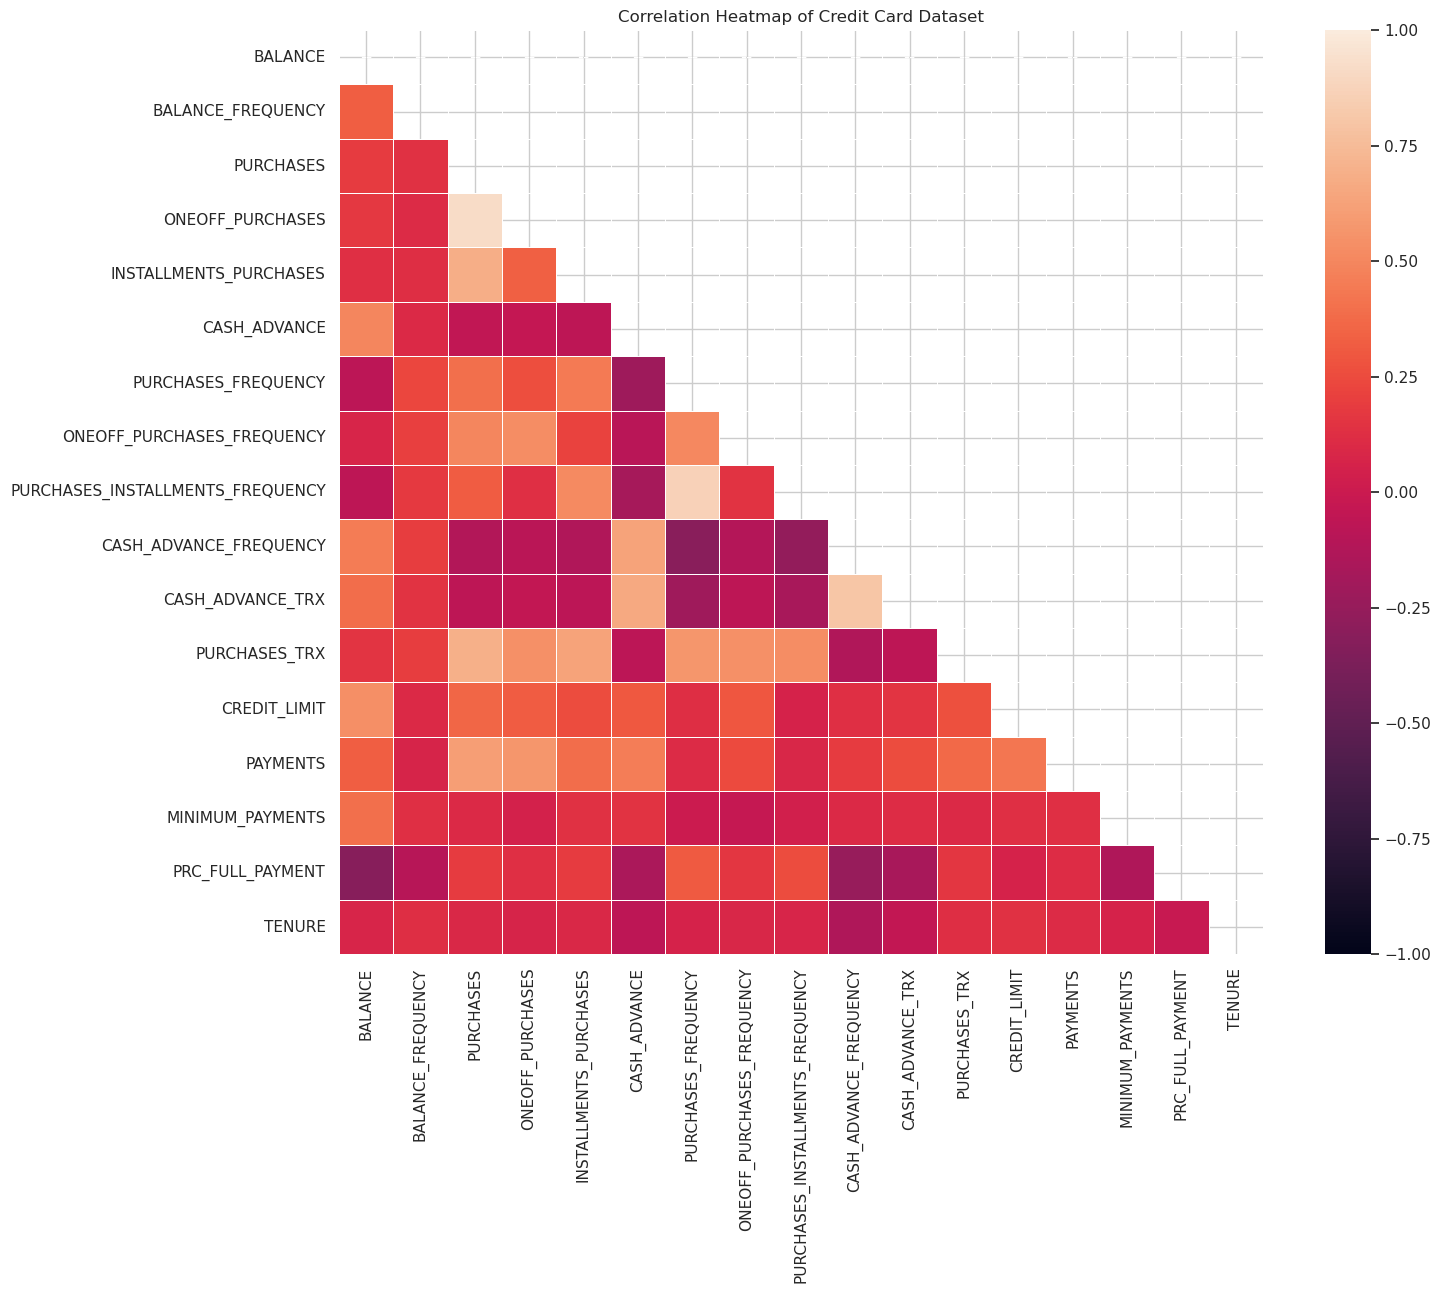

In [19]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap of Credit Card Dataset')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
heatmap = sns.heatmap(correlation,mask=mask, annot=True, fmt='.2f', vmax=1, vmin=-1, square=True, linewidths=.5)
plt.show()

Berdasarkan heatmap di atas fitur yang berkolerasi tinggi adalah sebagai berikut:
- `PURCHASES` dengan `ONEOFF_PURCHASES`
- `PURCHASES_INSTALLMENT_FREQUENCY` dengan `PURCHASES_FREQUENCY`
- `CASH_ADVANCE_TRX` dengan `CASH_ADVANCE_FRQUENCY`

**Kesimpulan**

- Korelasi tinggi antara jumlah maksimum pembelian yang dilakukan secara langsung dan jumlah pembelian yang dilakukan adalah hubungan yang diharapkan menurut logika bisnis. Oleh karena itu, sebaiknya tidak menghapus kedua variabel ini karena korelasi tinggi, karena hal tersebut dapat memengaruhi model.

- Hubungan antara frekuensi pembelian dengan pembayaran angsuran dan frekuensi pembelian secara keseluruhan sangat berkorelasi menurut logika bisnis, karena peningkatan frekuensi pembelian oleh konsumen dapat berdampak pada peningkatan frekuensi penggunaan kartu kredit dengan pembayaran angsuran.

- Korelasi antara jumlah transaksi yang dilakukan dengan penarikan tunai yang diberikan oleh pelanggan dan frekuensi pembayaran penarikan tunai sesuai dengan logika bisnis kartu kredit.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Berdasarakhan hasil dari EDA, jumlah data yang digunakan pada tahap clustering adalah `8950 baris` dan `17 kolom`

# Preprocessing

### Normalisasi dengan Standar Scaler

Pada kasus ini kita akan melakukan clustering dengan K-Means yang mana metodenya berbasis jarak. Normalisasi dengan Standar Scaler dapat mengurangi perbedaan skala antar fitur, sehingga mempermudah proses K-Means Clustering.

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [22]:
df_scaled = pd.DataFrame(data=scaled_data, columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


Data `df_scaled` merupakan data setelah dilakukan normalisasi. Selanjutnya kita akan menerapkan PCA.

### Principal Component Analysis (PCA)
Principal Component Analysis (PCA) adalah teknik dalam analisis data yang digunakan untuk mereduksi dimensi dari dataset dengan memproyeksikan data ke ruang dimensi yang lebih rendah. PCA dapat membantu mempersiapkan data sehingga algoritma clustering dapat bekerja lebih baik dalam ruang fitur yang direduksi.

Mereduksi data menjadi 2D.

In [23]:
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)


In [24]:
data_pca=pd.DataFrame(data=principal_components, columns=['pca1','pca2'])
data_pca.head()

,pca1,pca2
0,-1.683645,-1.072245
1,-1.134089,2.509148
2,0.969296,-0.383452
3,-0.888179,0.004593
4,-1.600027,-0.683785


Berdasarkan output di atas, data sudah direduksi menjadi 2 dimensi data.

# Kmeans Model

### Metode elbow untuk Mencari nilai K optimum pada K-Means

Kita akan melakuian elbow method untuk mencari K optimum dalam clustering kali ini.

In [25]:
wcss = []
for i in range(1,20):
   model = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
   model.fit(principal_components)
   wcss.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Methods')

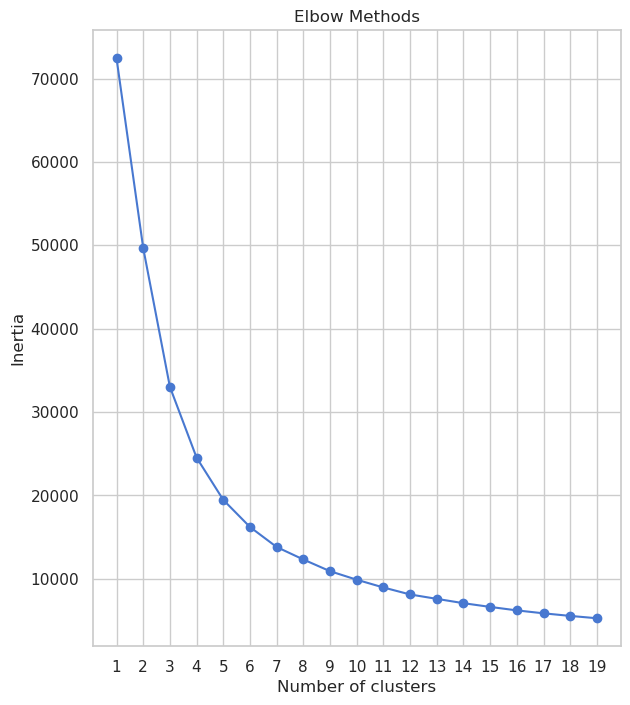

In [26]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(range(1,20), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.xticks([i for i in range(1,20)])
plt.ylabel('Inertia')
plt.title('Elbow Methods')

# plt.subplot(1,2,2)
# plt.plot(range(1,11), sil_score, marker='o')
# plt.xlabel('Number of clusters')
# plt.xticks([i for i in range(1,11)])
# plt.ylabel('Silhoutte Score')
# plt.title('Silhoutte Test')
# plt.show()

Berdasarkan output, dapat dilihat bahwa titik dimana terciptanya bentuk siku pada grafik Elbow terjadi ketika jumlah cluster (K) sama dengan 4-7 cluster.  Karena kita juga harus melihat computation cost saat menentukan jumlah cluster, maka memilih jumlah cluster yang lebih sedikit yaitu 4.

### Pendefinisian Model

Mendefinisikan model K-means dengan nilai K=4

In [48]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

Model k means di atas akan membagi data menjadi 4 kelompok.

### Pelatihan Model

Melakukan clustering dengan model kmeans yang sudah didefinisikan.

In [45]:
kmeans_model = kmeans.fit_predict(principal_components)
labels = kmeans.labels_ 
labels

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 2, ..., 1, 1, 1], dtype=int32)

Output di atas merupakan hasil clustering dengan menggunakan Kmeans label dari clustering yang sudah dilakukan.

### Evaluasi Model

Pada kasus kali ini kita akan mengevaluasi model dengan menggunakan Silhouette Score. 
Parameter ini mengukur seberapa baik setiap data dalam suatu kelompok dibandingkan dengan kelompok lainnya. Rentang nilai Silhouette Score adalah dari -1 hingga 1. Nilai yang lebih tinggi menunjukkan bahwa objek berada dalam kelompok yang sesuai dengan karakteristiknya sendiri dan tidak terlalu dekat dengan kelompok lain.

In [46]:
print(f'Silhouette Score to KMeans with PCA : {round(silhouette_score(principal_components, kmeans_model),3)}')

Silhouette Score to KMeans with PCA : 0.407


Nilai Silhouette Score sebesar `0.407` dapat diinterpretasikan sebagai indikasi pengelompokan yang relatif baik. 

### Labelling Data

Menyimpan salinan data ke variabel `kmeans_data` kemudian melakukan labeling berdasarkan hasil clusterisasi di tahap sebelumnya.

In [29]:
kmeans_data = df.copy()
kmeans_data['KMeansCluster'] = kmeans.labels_

Menampilkan data yang sudah diberi label.

In [30]:
kmeans_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansCluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


Visualisasi data yang sudah dilabeli berdasarkan PCA

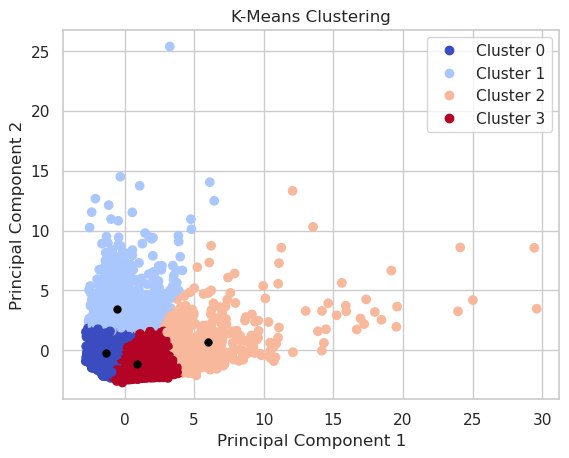

In [31]:
# Visualize the clusters in 2D space
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_model, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black', label = 'Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')

legend_labels = ['Cluster {}'.format(i) for i in range(len(np.unique(kmeans_model)))]
legend_labels.append('Centroids')

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

Gambar di atas menunjukkan bahwa ke 4 cluster terpisah dengan sangat baik di ruang PCA.

### **Kesimpulan**

Clustering dengan algoritma K-Means menunjukkan hasil yang relatif baik dengan Nilai Silhouette Score sebesar `0.407` di mana data awal direduksi menggunakan PCA menjadi dua fitur utama. Dari hasil clustering, terlihat bahwa data berhasil terbagi dengan baik menjadi 4 cluster.

# Hierarchical Clustering

### Mencari Jumlah Cluster dengan Dendogram

Dendrogram adalah representasi grafis dari hasil hierarchical clustering. Dalam dendrogram, setiap simpul (node) merepresentasikan suatu kelompok atau cluster, sementara tinggi dari garis yang menghubungkan dua simpul menunjukkan seberapa dekat atau seberapa jauh dua kelompok tersebut.

Tahap pertama adalah mendefinisikan matriks linkage(HC) untuk hierarchical clustering pada data `df_scaled`.

In [32]:
HC = linkage(df_scaled, method='ward')

`linkage `adalah fungsi dalam konteks hierarchical clustering yang digunakan untuk menggabungkan atau mengelompokkan data berdasarkan jarak antar-data. `Ward method` mengukur jarak antara dua kelompok dengan mempertimbangkan seberapa besar varians yang akan bertambah jika dua kelompok tersebut digabungkan. Metode ini berusaha untuk meminimalkan pertambahan varians total setelah penggabungan kelompok.

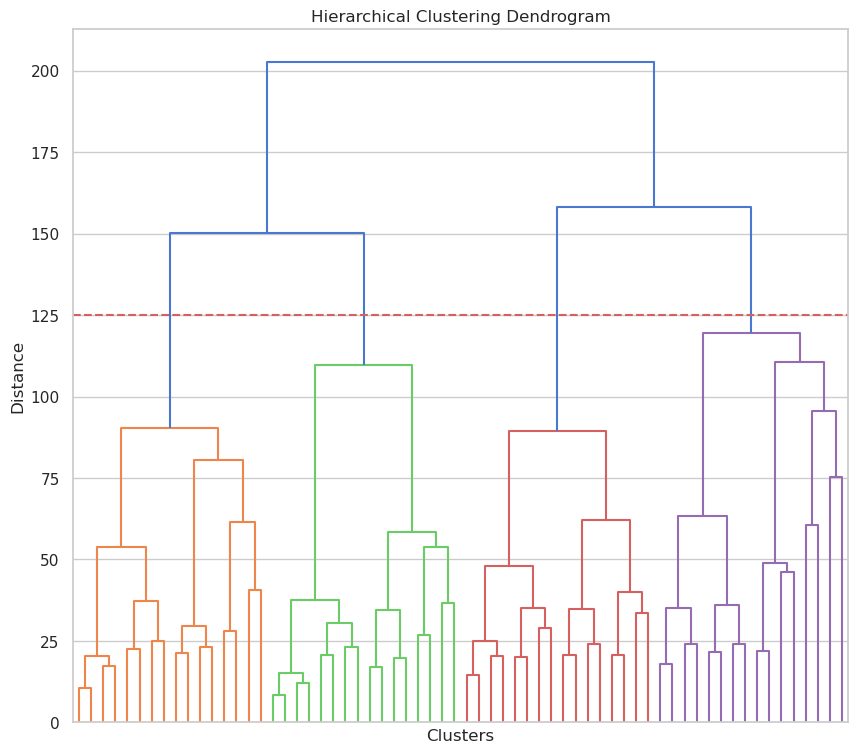

In [34]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')
dendrogram(HC, truncate_mode='level', p = 5, show_leaf_counts=True, no_labels=True)
plt.axhline(y=125, color='r', linestyle='--')
plt.show()

Sumbu x terdiri atas kumpulan data pengguna kartu kredit, sedangkan sumbu y merupakan jarak antara data-data tersebut. Garis vertikal dengan jarak maksimum adalah `garis biru`. Oleh karena itu kita dapat menentukan ambang batas sebesar `125` untuk memotong dendrogram tersebut. Setelah dilakukan pemotongan, didapatkan 4 cluster karena garis ini memotong dendrogram pada 4 titik. Langkah selanjutnya menerapkan hierarchical clustering dengan 4 cluster.

### Pendefinisian Model

In [47]:
hc_model = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = 'ward')
hc_model

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

Model ini akan melakukan hierarchical clustering dengan menggunakan algoritma agglomerative (menggabungkan) untuk membentuk 4 cluster dengan mengukur kedekatan dengan jarak Euclidean, dan menggunakan metode ward untuk penggabungan antar-kelompok.

### Pelatihan Model

Melakukan pelatihan data pada model `AgglomerativeClustering`

In [51]:
y_hc = hc_model.fit_predict(principal_components)
y_hc

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 2, ..., 0, 0, 0])

Output di atas merupakan hasil clustering dengan menggunakan `AgglomerativeClustering`.

### Evaluasi Model

Sama seperti kmeans kita akan mengevaluasi algoritma `AgglomerativeClustering` dengan Silhouette Score.

In [50]:
print(silhouette_score(principal_components, y_hc))

0.366761899651343


Nilai Silhouette Score sebesar` 0.367` dapat diinterpretasikan sebagai indikasi pengelompokan yang relatif baik. 

### Labelling Data

Menyimpan salinan data ke variabel `hc_data` kemudian melakukan labeling berdasarkan hasil clusterisasi di tahap sebelumnya.

In [36]:
hc_data = df.copy()
hc_data['HCluster'] = y_hc

Menampilkan data yang sudah diberi label.

In [37]:
hc_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,HCluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


Visualisasi data yang sudah dilabeli berdasarkan PCA

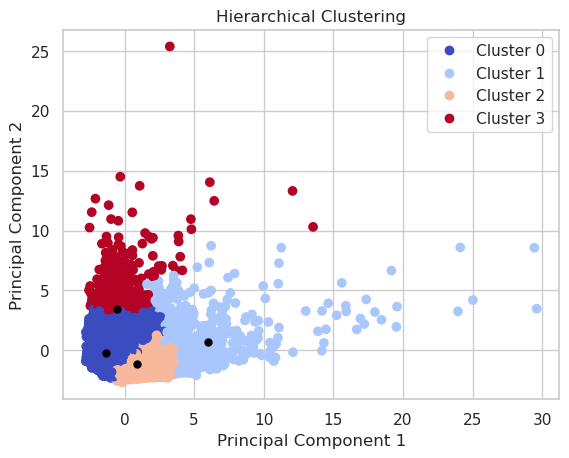

In [38]:
# Visualize the clusters in 2D space
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_hc, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black', label = 'Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering')

legend_labels = ['Cluster {}'.format(i) for i in range(len(np.unique(kmeans_model)))]
legend_labels.append('Centroids')

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

Gambar di atas menunjukkan bahwa ke 4 cluster terpisah dengan sangat baik di ruang PCA.

### **Kesimpulan**

Berdasarkan evaluasi menggunakan metode dendrogram dan linkage, dilakukan pembentukan model hirarki clustering `AgglomerativeClustering` dengan empat cluster. Model ini menghasilkan Silhouette Score sebesar 0.367, menunjukkan tingkat kualitas clustering yang relatif baik.

# Inferensi Model


<!-- pickle.dump(svm_model, open('model_svm.pkl','wb')) -->

In [53]:
pickle.dump(kmeans, open('model_kmeans.pkl','wb'))

In [54]:
model_path = ['/home/rmfarizky/Hacktiv8-Learncode/project/model_kmeans.pkl']

In [56]:
with open(model_path[0], 'rb') as file:
    model_kmeans = pickle.load(file)

# Conclusion

Berikut merupakan kesimpulan yang dapat diambil dari beberapa kegiatan yang telah dilakukan.
1.  Hasil dari `Exploratory Data Analysis (EDA)` menunjukkan bahwa:
    - Mayoritas pengguna cenderung memilih tenur pembayaran kartu kredit selama 12 bulan.
    - Pengguna cenderung melakukan pembelian dengan angsuran (Purchase Installments), sebagaimana terlihat dari kesamaan grafik PURCHASE_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY. 
    - Jumlah belanja yang sering dilakukan oleh pengguna cenderung kecil (di bawah 10000), dan jumlah pembayaran serta frekuensi penggunaan kartu kredit cenderung jarang dan berkisar di nominal yang kecil.
    - Pengguna cenderung melakukan pembelian dengan angsuran (Purchase Installments), sebagaimana terlihat dari kesamaan grafik PURCHASE_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY.
2. Hasil clustering dengan algoritma `K-Means` menunjukkan pembagian data dengan baik menjadi 4 cluster. Penggunaan elbow method menunjukkan bahwa jumlah cluster optimal adalah 4. Hasil Evaluasi Kmeans dengan Silhouette score mencapai `0.407`. Begitu juga dengan `Hierarchical Clustering` menunjukkan pembagian data dengan baik menjadi 4 cluster dengan Silhouette score sebesar `0.367`.
3.  Berdasarkan nilai parameter Silhouette Score yang lebih tinggi, dapat disimpulkan bahwa algoritma `K-Means` cenderung lebih efektif dalam mencluster data dibandingkan dengan algoritma `Hierarchical clustering` dalam konteks analisis yang dilakukan